* Student name: Ndanu Mwatu
* Student pace: Part time
* Date: 24 July 2023

<img src="film-g24617f6ce_640.jpg" width="600" height="200" align="left">

# Microsoft Movie Start-up Analysis

**Author:** Ndanu Mwatu

<hr style="border:1px solid gray">

### Outline:
1. 0 Overview
2. 0 Business Problem
3. 0 Data Understanding
4. 0 Data Preparation
5. 0 Data Modelling and Evaluation
    * 1.Which movie genres are most popular with viewers?
    * 2.What are the runtimes of the most popular movie genres?
    * 3.Which month of release of movies yields highest ratings?
6. 0 Conclusions and Next Steps

<hr style="border:1px solid gray">

## 1.0 Overview

This project seeks to generate business insights for Microsoft's Movie Start-up by analyzing movie data from Internet Movie Database(IMDB) and The Movie Database(TMDB).

<hr style="border:1px solid gray">

## 2.0 Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. We are charged with exploring what types of films are currently doing the best at the box office and translating these findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

<hr style="border:1px solid gray">

## 3.0 Data Understanding

<img src="stock-g4b9499a88_640.jpg" width="370" height="200" align="left">

**Introduction**

This project utilizes movies data drawn from Internet Movie Database(IMDB) and The Movie Database(TMDB). We make use of 2 datasets from IMDB - the Basics and Ratings databases. IMDB Basics database contains movie genres amongst other data, whilst IMDB Ratings contains information about movie ratings and voting for the same. The TMDB database contains various data including  movie release dates, ratings and number of votes.

In this section, we shall explore the data from each of these 3 datasets to gain a deeper understanding.

In [1]:
# Loading necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Reading the datasets
basics_imdb = pd.read_csv('title.basics.csv')
ratings_imdb = pd.read_csv('title.ratings.csv')
movies_tmdb = pd.read_csv('tmdb.movies.csv')

In [3]:
# Checking dataset information 
basics_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [4]:
ratings_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [5]:
movies_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


**a) Exploring the IMDB Basics data** 

We explore the IMDB Basics dataset to get a general understanding beginning with a preview of the first few rows. We then focus on the genres column which we are particularly interested in and observe the following:

* we learn that films can be assigned more than one genre i.e. they often have a combination of genres e.g. biography and drama
* we learn that there are many kinds of unique genre combinations in our dataset i.e. 1086 No.

In [6]:
#preview first few rows of basics dataset
basics_imdb.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [7]:
# Explore the distribution of the various genres
basics_imdb['genres'].value_counts()

Documentary                  32185
Drama                        21486
Comedy                        9177
Horror                        4372
Comedy,Drama                  3519
                             ...  
Animation,Music,Mystery          1
Biography,Family,Fantasy         1
Music,Musical,Reality-TV         1
Documentary,Horror,Sci-Fi        1
Action,Adventure,Musical         1
Name: genres, Length: 1085, dtype: int64

In [8]:
# Get the number of unique genre combinations
print("No. of unique genre combinations is:", len(basics_imdb['genres'].unique()))

No. of unique genre combinations is: 1086


**b) Exploring the IMDB Ratings data** 

From the IMDB Ratings dataset we preview the first few rows of the dataset and see that there are 2 columns of interest - the averagerating and the numvotes. Since the main columns are numeric, we get their summary statistics and note the following:

* we learn the number of votes cast (numvotes) ranges from 5 to 1841066
* we note that the average rating ranges from 1 to 10
* we calculate the most common rating and find it to be 7

In [9]:
#preview first few rows of ratings dataset
ratings_imdb.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [10]:
# Get a summary of descriptive statistics
ratings_imdb.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [11]:
# Exploring the most common rating in this data set
most_common_rating = ratings_imdb['averagerating'].value_counts().idxmax()
freq_most_common_rating = ratings_imdb['averagerating'].value_counts().max()

print("most common rating is:", most_common_rating )
print("frequency of most common rating is:", freq_most_common_rating )

most common rating is: 7.0
frequency of most common rating is: 2262


**c) Exploring the TMDB Movies data** 

From the TMDB dataset we preview the first few rows of the dataset and see there are 3 columns of interest i.e. release_date, vote_average and vote_count. we get summary statistics of 2 key numeric columns of interest i.e. vote_average and vote_count and note the following:

* we learn the number of votes cast (vote_count) ranges from 1 to 22186
* we note that the average vote ranges from 0 to 10 
* we calculate the most common average vote and find it to be a 6

In [12]:
#preview first few rows of tmdb movies dataset
movies_tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [13]:
# Get a summary of descriptive statistics for numeric columns of interest
movies_tmdb[["vote_average","vote_count"]].describe(include="all")

,vote_average,vote_count
count,26517.000000,26517.000000
mean,5.991281,194.224837
std,1.852946,960.961095
min,0.000000,1.000000
25%,5.000000,2.000000
50%,6.000000,5.000000
75%,7.000000,28.000000
max,10.000000,22186.000000


In [14]:
# Exploring the most common average vote in this data set
most_common_voteavg = movies_tmdb['vote_average'].value_counts().idxmax()
freq_most_voteavg = movies_tmdb['vote_average'].value_counts().max()

print("most common average vote is:", most_common_voteavg )
print("frequency of most common average vote is:", freq_most_voteavg )

most common average vote is: 6.0
frequency of most common average vote is: 1940


<hr style="border:1px solid gray">

## 4.0 Data Preparation

**Introduction**

To prepare our data for analysis, we clean it and merge dataframes. A summary of the actions taken is provided:
* drop unnecessary columns - from imdb basics and tmdb dataframes. We keep all the columns in imdb ratings
* merge dataframes - the imdb basics and imdb ratings dataframes
* check for duplicated data
* check for and deal with missing values

**a) dropping unnecessary columns** 

In [15]:
# Drop unnecessary columns in imdb basics dataframe
basics_imdb.drop(columns = ['primary_title', 'original_title', 'start_year'], inplace=True )

In [16]:
# Drop unnecessary columns in tmdb movies dataframe
# 'unnamed: 0' column is not dropped inorder to maintain unique identifiers of each row thus avoid false duplicates
movies_tmdb.drop(columns = ['genre_ids', 'id', 'original_language', 'original_title', 'popularity', 'title'], inplace=True )

**b) Merge the IMDB dataframes**

In [17]:
# Merge the 2 dataframes using 'tconst' as the shared key and an inner join,
# so that we only keep values common to both dataframes
merged_imdb = basics_imdb.merge(ratings_imdb, on="tconst", how="inner")

In [18]:
merged_imdb.head()

,tconst,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,114.0,"Biography,Drama",7.2,43
2,tt0069049,122.0,Drama,6.9,4517
3,tt0069204,NaN,"Comedy,Drama",6.1,13
4,tt0100275,80.0,"Comedy,Drama,Fantasy",6.5,119


**c) Check for duplicated data**

* we check and find there are no duplicates in the imdb merged dataframe and in the tmdb dataframe 

In [19]:
# Check for duplicated values in merged_imdb dataframe
merged_imdb.duplicated().value_counts()

False    73856
dtype: int64

In [20]:
# Check for duplicated values in tmdb_df
movies_tmdb.duplicated().value_counts()

False    26517
dtype: int64

**d) Check for and deal with missing values**

* We check for missing values, calculate the percentage of missing values, and take appropriate action 

In [21]:
# investigate imdb dataframe for missing values
merged_imdb.isna().sum()

tconst                0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [22]:
# Calculate the percentage of missing values in imdb dataframe
# we find runtime_minutes missing values are ~10% and genres is ~1% of dataset
print('Null runtime_mins values:', len(merged_imdb[merged_imdb.runtime_minutes.isna()])/ len(merged_imdb))
print('Null genres values:', len(merged_imdb[merged_imdb.genres.isna()])/ len(merged_imdb))

Null runtime_mins values: 0.10317374350086655
Null genres values: 0.010886048526863085


**Decision to remove rows with missing values:**
* We decide to remove all rows with missing values from the merged imdb dataframe because both of these columns are necessary for our analysis and we cannot guess or meaningfully fill the missing values without error. 
* Additionally, we cannot maintain the missing data in the dataframe as we need to carry out mathematical analyses which require actual values for computation.
* Furthermore, at ~10% out of more than 70,000 rows of data, it is deemed to not be a significant loss to our data. 

In [23]:
# drop the rows with missing values
merged_imdb = merged_imdb.dropna()
merged_imdb.isna().sum()

tconst             0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

In [24]:
# investigate tmdb dataframe for missing values
# we find there are no missing values in this dataframe 
movies_tmdb.isna().sum()

Unnamed: 0      0
release_date    0
vote_average    0
vote_count      0
dtype: int64

<hr style="border:1px solid gray">

## 5.0 Data Modeling and Evaluation (Feature Engineering, Analysis  and Evaluation)
Our aim is to advice our client on the types of films that are currently doing the best at the box office. For this we will 
seek to answer 3 questions:
1. Which **movie genres** are most popular with viewers? - we shall use the imdb merged dataframe to answer this.
2. What are the **runtimes** of the most popular movie genres? - we shall use the imdb merged dataframe to answer this.
3. Which **month of release** of movies yields highest ratings? - we shall use the tmdb dataframe to answer this.

*For clarity and ease of understanding; we tackle Data Modelling and Evaluation per question.*

<img src="statistics-g50fa22861_640.jpg" width="350" height="200" align="left">

<hr style="border:1px solid gray">

### 1. Which movie genres are most popular with viewers?

**Introduction**

Our aim is to find out the top 5 most highly rated movie genres.
* We will take into account movie ratings (averagerating) as the measure of popularity of a movie and indicator of how well a movie would do at the box office. We will also moderate the ratings based on number of votes cast (numvotes).
* We will make use of several features including filter the data by a certain parameter, apply groupby with aggregation and visualize the results. 
* We will begin with a quick detour, to get an overview of the top 5 most common movie genres. Our aim is to have an understanding of which movies are commonly in production whether popular with viewers or not.

**Overview: most commonly produced movie genres, without considering ratings**

In [25]:
# Top 5 most common movie genres in production, without considering ratings
top_genres = list(merged_imdb['genres'].value_counts().nlargest(5).index[:5])
top_genres_counts = list(merged_imdb['genres'].value_counts().nlargest(5).sort_values(ascending=False))

print("Genres:", top_genres)
print("Counts:", top_genres_counts)

Genres: ['Drama', 'Documentary', 'Comedy', 'Comedy,Drama', 'Horror']
Counts: [10189, 9149, 4604, 2451, 2232]


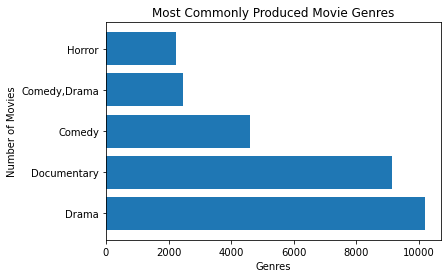

In [26]:
plt.figure(figsize=(6,4))

plt.barh(top_genres, top_genres_counts)

plt.xlabel('Genres')
plt.ylabel('Number of Movies')

plt.title('Most Commonly Produced Movie Genres')

plt.show()

**Top 5 most highly rated movie genres**

Having established the most commonly produced genres are Dramas followed by Documentaries, we now analyse which genres are most popular with viewers as per the ratings.

**a) Filter out ratings with few votes**
* From the initial exploratory data analysis, we saw the votes cast range from 5 to 1841066. We shall consider ratings with a minimum of 50 votes inorder to get a truer picture of a movie's popularity. (We choose 50 as it's close to the value at the 50th percentile i.e. median, as per the summary statistics) 

In [27]:
# filter out rows where number of votes is less than 50
filtered_merged_imdb = merged_imdb.loc[merged_imdb['numvotes'] > 50]

**b) Group the data by genres and aggregate by mean of average rating and mean of runtime_minutes**

In [28]:
# group data and display the results of the top 5 genres based on the mean of average rating
top5genres = filtered_merged_imdb.groupby('genres')[['averagerating', 'runtime_minutes']].mean().nlargest(5,'averagerating')
top5genres            

,averagerating,runtime_minutes
genres,,
"Adventure,Documentary,Western",9.2,77.0
"Documentary,Drama,Thriller",8.4,98.0
"Mystery,News,Thriller",8.4,88.0
"Comedy,History,Musical",8.3,134.0
"Animation,Crime,Mystery",8.2,116.0


**Evaluating the results**

-The results of the movie genres that are doing well in the box office are seen to be different from the commonly produced genres. Adventure,Documentary& Western genre combination is the most popular.These top 5 genre combinations will thus be recommended to the client for production.

-A graphical representation of the same follows.

<AxesSubplot:title={'center':'Top 5 Highest Rated Movie Genres'}, ylabel='Genres'>

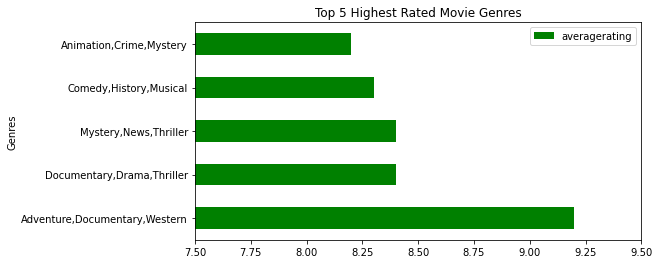

In [29]:
top5genres.plot(color='green', y='averagerating', xlim=[7.5, 9.5], kind='barh', figsize=(8,4), title="Top 5 Highest Rated Movie Genres", xlabel="Genres", ylabel="Ratings")

<hr style="border:1px solid gray">

### 2. What are the runtimes of the most popular movie genres?

**Introduction**

Our aim is to investigate the length i.e. runtimes of the top 5 most popular movie genres from question 1.

* We will make use of the data analysed in question 1 where we grouped our data by genres and aggregated by mean of the average ratings and mean of the runtimes into the variable 'top5genres'. This was done after limiting the minimum number of votes for the ratings to 50. 
* We begin with a quick overview of the typical movie runtimes considering all movies in the merged_imdb dataframe.

**Overview: runtimes of all movies genres in production, without considering ratings**

In [30]:
# Runtimes of all movies in our dataframe
all_runtimes = list(merged_imdb['runtime_minutes'].value_counts().nlargest(5).index[:5])
all_runtimes_counts = list(merged_imdb['runtime_minutes'].value_counts().nlargest(5).sort_values(ascending=False))

print("Runtime:", all_runtimes)
print("Counts:", all_runtimes_counts)

Runtime: [90.0, 80.0, 85.0, 100.0, 95.0]
Counts: [4718, 2142, 2048, 1954, 1919]


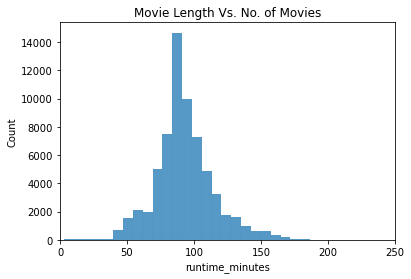

In [31]:
sns.histplot(data=merged_imdb, x='runtime_minutes', bins=7000).set_title('Movie Length Vs. No. of Movies')
plt.xlim(0, 250)
plt.show()

**Runtimes of Top 5 Highest Rated Movie Genres**

We have established the most common movie length is **90** minutes i.e one and a half hours, but we now want to know the lengths of the top 5 highest rated movie genres using data from question 1.

In [32]:
top5genres 

,averagerating,runtime_minutes
genres,,
"Adventure,Documentary,Western",9.2,77.0
"Documentary,Drama,Thriller",8.4,98.0
"Mystery,News,Thriller",8.4,88.0
"Comedy,History,Musical",8.3,134.0
"Animation,Crime,Mystery",8.2,116.0


**Evaluating the results**

-It is observed that the runtimes of the top 5 highest rated movie genre combinations range from 77 minutes to 134 minutes i.e. approximately one and a quarter hours to two and a quarter hours.

-It is also obseved that the length of the movie is dependent on the genre of the movie. For instance, of our top 5 genres, Adventure,Documentary&Western genre combinations are the shortest in length while Comedy,History&Musical genre combinations tend to be the longest. Mystery,News&Thriller have almost the typical common movie length of one and a half hours.

-A graphical representation of the same follows.

<AxesSubplot:title={'center':'Runtimes of Top 5 Highest Rated Movie Genres'}, xlabel='Genres', ylabel='Avg. Runtime'>

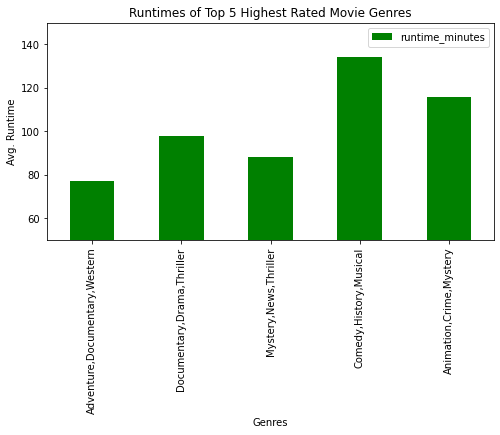

In [33]:
top5genres.plot(color='green', y='runtime_minutes', ylim=[50, 150], kind='bar', figsize=(8,4), title="Runtimes of Top 5 Highest Rated Movie Genres", xlabel="Genres", ylabel="Avg. Runtime")

<hr style="border:1px solid gray">

### 3. Which month of release of movies yields highest ratings? 

**Introduction**

Our aim is to offer insights to our client on the best time of year to release films at the box office to achieve highest regard. 

* We will analyse the data, specifically the release_date to extract the month the movie was released and weigh this against  movie ratings (vote_average). The vote_average is the measure of popularity of a movie that also indicates how well a movie is likely to do at the box office. We will also moderate our data using the number of votes cast (vote_count).
* We will make use of several features including change a datatype, create a new column to our dataframe, filter the data by a certain parameter, apply groupby with aggregation and visualize the results. 

**a) Change the release_date from strings to datetime object**

In [34]:
# investigate release_date datatype
movies_tmdb['release_date'].head(3)

0    2010-11-19
1    2010-03-26
2    2010-05-07
Name: release_date, dtype: object

In [35]:
#convert the date from object(strings) to datetime object
movies_tmdb['release_date'] = pd.to_datetime(movies_tmdb['release_date'])
movies_tmdb['release_date'].head(3)

0   2010-11-19
1   2010-03-26
2   2010-05-07
Name: release_date, dtype: datetime64[ns]

**b) Create a new column with months as extracted from datetime object**

In [36]:
# Preview the first few rows of the dataframe
movies_tmdb.head(3)

,Unnamed: 0,release_date,vote_average,vote_count
0,0,2010-11-19,7.7,10788
1,1,2010-03-26,7.7,7610
2,2,2010-05-07,6.8,12368


In [37]:
# Create a new feature (column) named release_month to contain the month as extracted from the datetime object
movies_tmdb['release_month'] = movies_tmdb['release_date'].dt.month_name()
movies_tmdb.head(3)

,Unnamed: 0,release_date,vote_average,vote_count,release_month
0,0,2010-11-19,7.7,10788,November
1,1,2010-03-26,7.7,7610,March
2,2,2010-05-07,6.8,12368,May


**c) Filter out ratings with few votes**
* From the initial exploratory data analysis, we found the votes cast range from 1 to 22186. We decide to consider ratings with a minimum of 5 votes inorder to get a truer picture of a movie's popularity. (We choose 5 as it's the value at the 50th percentile i.e. median, as per the summary statistics) 

In [38]:
# filter out rows where number of votes is less than 5
filtered_tmdb = movies_tmdb.loc[movies_tmdb['vote_count'] > 5]

**d) Group the data by release_month and aggregate by mean of vote_average**

In [39]:
# group the data and display the results by order of months
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
filtered_grouped_tmdb = filtered_tmdb.groupby('release_month')['vote_average'].mean().reindex(months)
filtered_grouped_tmdb

release_month
January      5.819506
February     5.901188
March        6.025209
April        6.030595
May          5.841406
June         5.945040
July         5.918766
August       5.926696
September    5.977292
October      5.921614
November     6.134706
December     6.090443
Name: vote_average, dtype: float64

**Evaluating the results**

-It is seen that, movies released at the end of the year i.e. November and December have highest ratings while those released in January and May tend to have lowest ratings. November and December will thus be recommended to the client as best months to release movies.

-A graphical representation of the same follows.

<AxesSubplot:title={'center':'Month of Release vs Ratings'}, xlabel='Month of release', ylabel='Ratings'>

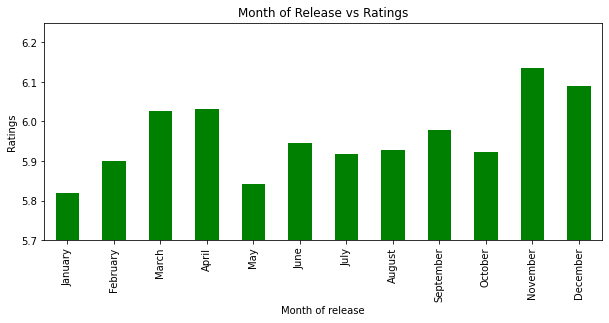

In [40]:
filtered_grouped_tmdb.plot(ylim=[5.7, 6.25], kind='bar', color = 'green', figsize=(10,4), title="Month of Release vs Ratings", xlabel="Month of release", ylabel="Ratings")

<hr style="border:1px solid gray">

## 6.0 Conclusions and Next Steps

<img src="headphones-g6b8435f4d_640.jpg" width="250" height="200" align="left">

### Conclusions
An analysis of movies that are currently doing the best at the box office, based on 3 key questions, reveals which movies Microsoft's new studio should produce. 3 recommendations are made:

**1. Genres of movies to produce:**

Pursue production of movies of the following genres:
* Adventure,Documentary,Western 
* Documentary,Drama,Thriller 
* Mystery,News,Thriller
* Comedy,History,Musical 
* Animation,Crime,Mystery

These are the top 5 most popular movie genres among viewers.

**2. Runtimes of movies to be produced:**

Produce movies with the following approximate runtimes:
* 77 minutes - Adventure,Documentary,Western
* 98 minutes - Documentary,Drama,Thriller
* 88 minute - Mystery,News,Thriller
* 134 minutes - Comedy,History,Musical
* 116 minutes - Animation,Crime,Mystery

These are approximate lengths, the actual production times could vary slighty.

**3. Month of release to the box-office:**

Release majority of the movies produced in November and December, since movies released in these months tend to be most popular. Some could also be released in March and April. Further, avoid releasing films in January and May as they tend to have lower ratings

### Next Steps
Further analysis is recommended in the following areas for additional insights:

* **Gross earnings:** An analysis of box office gross earnings in addition to popularity (ratings), to further refine the kinds of movies to pursue.
* **Production budget:** An examination of production budgets per recommended movie genre, to give the client a feel of the production capital needed. 
* **Streaming services:** An investigation into popularity and earnings of films produced for streaming services such as Netflix, as opposed to box office release only, to guide the client on best approaches.
